In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


# The Sequential model API

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#### Build a convolutional neural network model

In [3]:
model = Sequential([
    Flatten(input_shape = (28,28), name="input"),
    Dense(16, activation="relu"),                  
    Dense(16, activation="relu"),                  
    Dense(10, activation="softmax", name="output")                                     
])

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [5]:
# Define the model optimizer, loss function and metrics
# define optimizer as an objetc
opt = tf.keras.optimizers.Adam(learning_rate=.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = [acc, mae]
              )


In [13]:
# Print the resulting model attributes

print("MODEL LOSS: ", model.loss,"\n")
print("MODEL OPTIMIZER: ", model.optimizer, "\n")
print("MODEL METRICS NAME: ", model.metrics_names, "\n")
print("MODEL LEARNING RATE: ", model.optimizer.learning_rate, "\n")

MODEL LOSS:  sparse_categorical_crossentropy 

MODEL OPTIMIZER:  <keras.src.optimizers.adam.Adam object at 0x0000020E35323160> 

MODEL METRICS NAME:  [] 

MODEL LEARNING RATE:  <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005> 



***
<a id="coding_tutorial_4"></a>
## The fit method

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [15]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [16]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)
train_labels

(60000, 28, 28)
(60000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [18]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

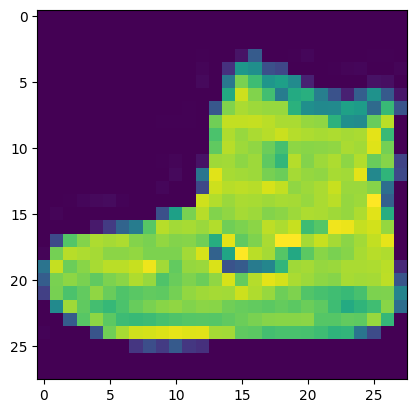

label : Ankle boot


In [22]:
# Display one of the images
plt.imshow(train_images[0])
plt.show()
print(f"label : {labels[train_labels[0]]}")

#### Fit the model

In [20]:
# Fit the model
history = model.fit(train_images[...,np.newaxis],train_labels, batch_size= 256, epochs= 20)


Epoch 1/20
235/235 [==============================] - 2s 3ms/step - loss: 1.0609 - sparse_categorical_accuracy: 0.6543 - mean_absolute_error: 4.4200
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.5835 - sparse_categorical_accuracy: 0.8018 - mean_absolute_error: 4.4200
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.5110 - sparse_categorical_accuracy: 0.8240 - mean_absolute_error: 4.4200
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.4792 - sparse_categorical_accuracy: 0.8335 - mean_absolute_error: 4.4200
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.4591 - sparse_categorical_accuracy: 0.8398 - mean_absolute_error: 4.4200
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.4454 - sparse_categorical_accuracy: 0.8444 - mean_absolute_error: 4.4200
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4324 - sparse_categorical_accu

#### Plot training history

In [23]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,1.060947,0.654267,4.420001
1,0.583544,0.801783,4.420001
2,0.510951,0.824033,4.420000
3,0.479177,0.833467,4.420000
4,0.459137,0.839783,4.420001
5,0.445403,0.844433,4.420000
6,0.432396,0.848533,4.420000
7,0.423942,0.852083,4.420001
8,0.415289,0.855867,4.420001
9,0.409069,0.858517,4.420001


<AxesSubplot: title={'center': 'Loss vs Epoch'}>

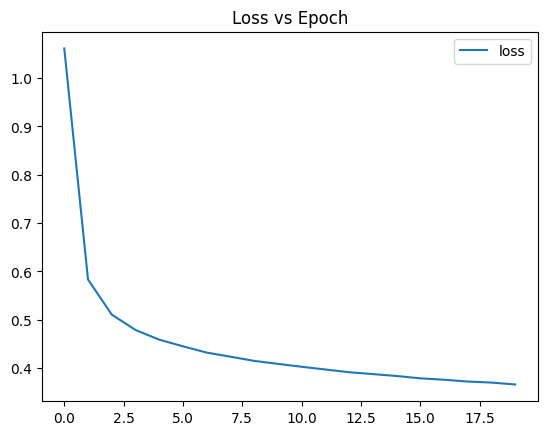

In [24]:
# Make a plot for the loss

df.plot( y = "loss", title = "Loss vs Epoch")



<AxesSubplot: title={'center': 'sparse_categorical_accuracy vs Epoch'}>

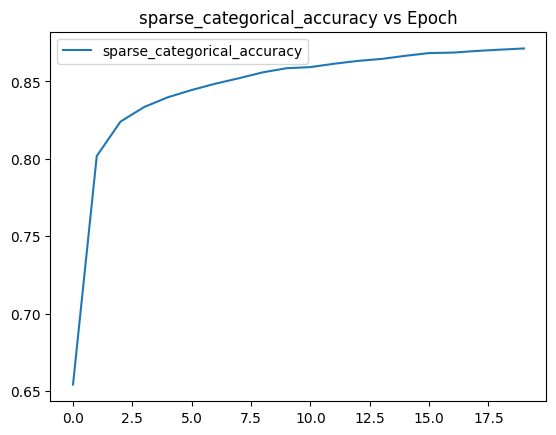

In [25]:
# Make a plot for the accuracy

df.plot( y = "sparse_categorical_accuracy", title = "sparse_categorical_accuracy vs Epoch")



<AxesSubplot: title={'center': 'mean_absolute_error vs Epoch'}>

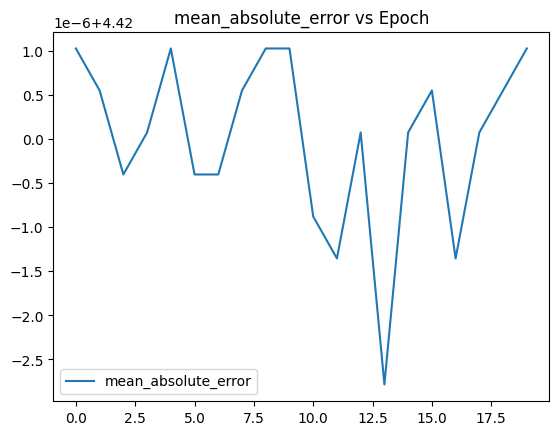

In [26]:
# Make a plot for the additional metric
df.plot( y = "mean_absolute_error", title = "mean_absolute_error vs Epoch")



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [28]:
print(test_images.shape)
print(test_images[...,np.newaxis].shape)

(10000, 28, 28)
(10000, 28, 28, 1)


In [29]:
# Evaluate the model
loss, accuracy, mae = model.evaluate(test_images[...,np.newaxis], test_labels)
print("loss", loss)
print("acc", accuracy)
print("mae", mae)

313/313 [==============================] - 1s 2ms/step - loss: 0.4138 - sparse_categorical_accuracy: 0.8548 - mean_absolute_error: 4.4200
loss 0.41380575299263
acc 0.8547999858856201
mae 4.419997215270996


#### Make predictions from the model

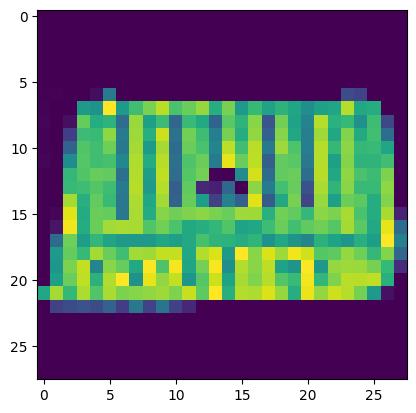

Label: Bag


In [38]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [40]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print("Model", labels[np.argmax(pred)])

1/1 [==============================] - 0s 35ms/step
Model Bag


In [41]:
pred

array([[1.9462572e-02, 2.4611520e-04, 1.4063426e-03, 4.9989605e-05,
        3.7464702e-03, 2.3369503e-06, 1.6160605e-02, 7.9933031e-08,
        9.5892537e-01, 7.2795544e-08]], dtype=float32)

In [42]:
import pandas as pd
df = pd.DataFrame(pred)
df

,0,1,2,3,4,5,6,7,8,9
0,0.019463,0.000246,0.001406,0.00005,0.003746,0.000002,0.016161,7.993303e-08,0.958925,7.279554e-08


<AxesSubplot: >

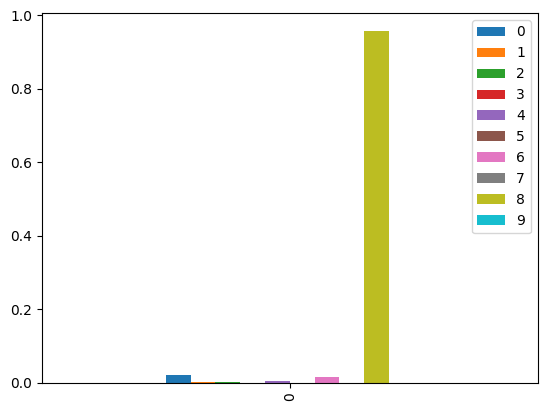

In [43]:
df.plot.bar()